In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.isnull().sum() #no null values

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
#select the feature 
X = df.iloc

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

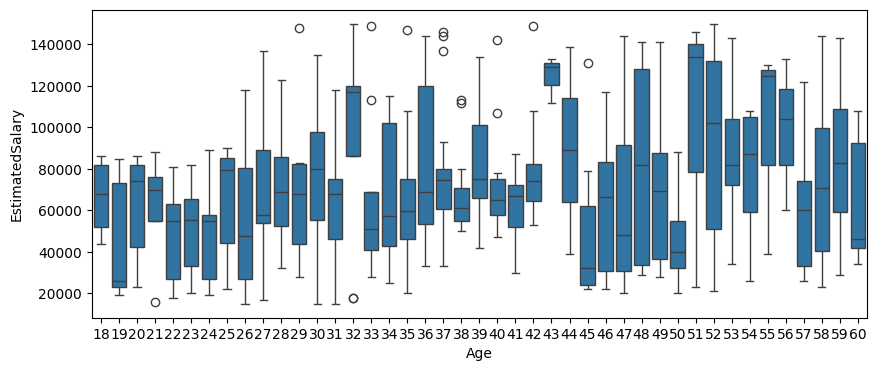

In [16]:
#check the outliers 
#present but still don't remove outliers since some low age people may earn high salary
plt.figure(figsize=(10,4))
sns.boxplot(x='Age', y='EstimatedSalary', data=df)

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64


<Axes: ylabel='Age'>

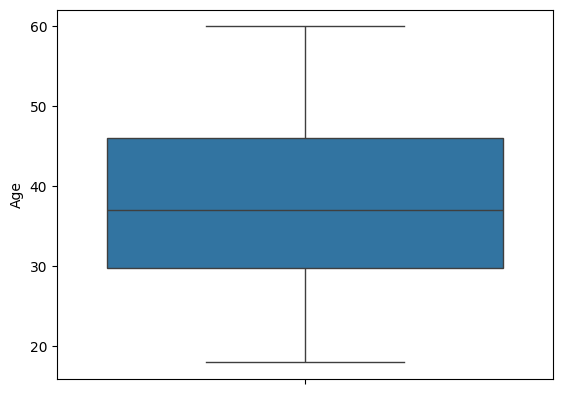

In [24]:
print(df["Age"].describe())
sns.boxplot(data=df["Age"])


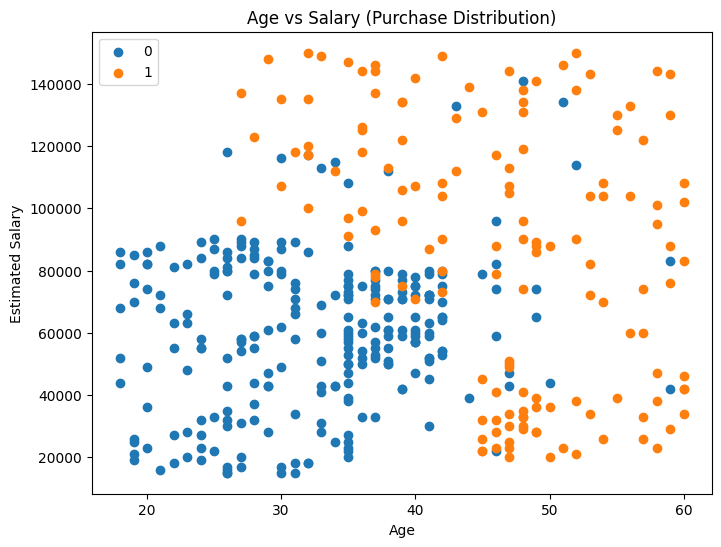

In [20]:
plt.figure(figsize=(8,6))

for value in df['Purchased'].unique(): #stores unique values of purchase in value [0,1]
    subset = df[df['Purchased'] == value] #creates new dataframe contaning rows only 0 and in 2nd iteration 1 as purchase
    plt.scatter(subset['Age'],
                subset['EstimatedSalary'],
                label=value) #label 0, then label 1

plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend() #to display label 0,1 we need this
plt.title("Age vs Salary (Purchase Distribution)")
plt.show()

#inference: people with more age has more probability of buying a house, as more orange on rightside

In [25]:
#gender is object so make it numberic for model training
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1}) #label encoding

In [41]:
#feature Selection
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [44]:
# Age: Usually ranges from 18 to 60.
# EstimatedSalary: Ranges from 15,000 to 150,000.
# Because 150,000 is mathematically much "larger" than 60, the Logistic Regression model will mistakenly 
# think Salary is thousands of times more important than Age.
#therefore scaling is required
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [45]:
#create and train logistic model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [46]:
#predict Test Set Results
y_pred = model.predict(X_test)

In [48]:
cm = confusion_matrix(y_test,y_pred)

In [49]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [50]:
#performance matrix
accuracy = accuracy_score(y_test,y_pred)
error_rate = 1-accuracy
precision = precision_score(y_test,y_pred)

In [51]:
# Step 10: Print Results
print("Confusion Matrix:\n", cm)
print("\nTrue Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

print("\nAccuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)

Confusion Matrix:
 [[61  3]
 [11 25]]

True Positive (TP): 25
True Negative (TN): 61
False Positive (FP): 3
False Negative (FN): 11

Accuracy: 0.86
Error Rate: 0.14
Precision: 0.8928571428571429
